<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Day_5_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('/content/concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

In [9]:
df.min()

,0
Cement,102.00
Blast Furnace Slag,0.00
Fly Ash,0.00
Water,121.80
Superplasticizer,0.00
Coarse Aggregate,801.00
Fine Aggregate,594.00
Age,1.00
Strength,2.33


In [10]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [11]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
y_train

,Strength
995,27.68
507,62.05
334,23.80
848,33.40
294,7.40
...,...
87,24.40
330,42.22
466,33.56
121,68.30


In [13]:
# Applying Regression withut any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [16]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=5))

np.float64(0.46099404916628606)

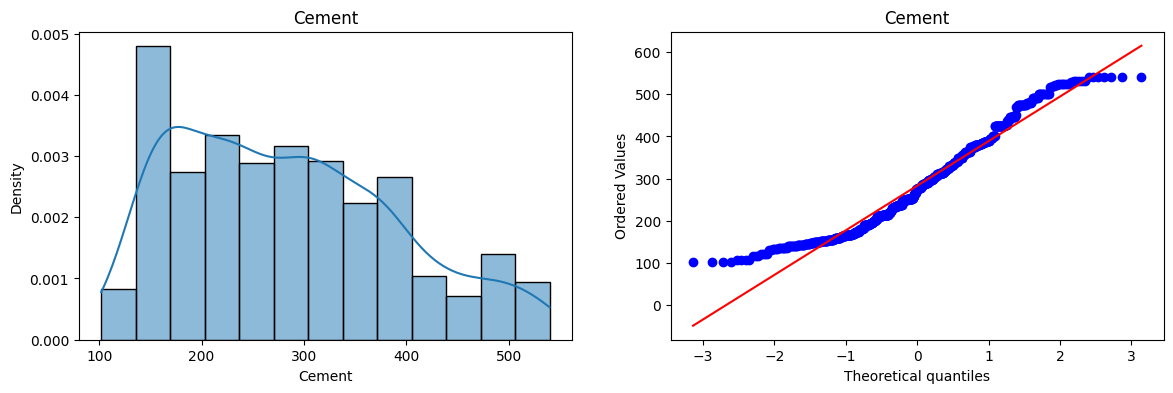

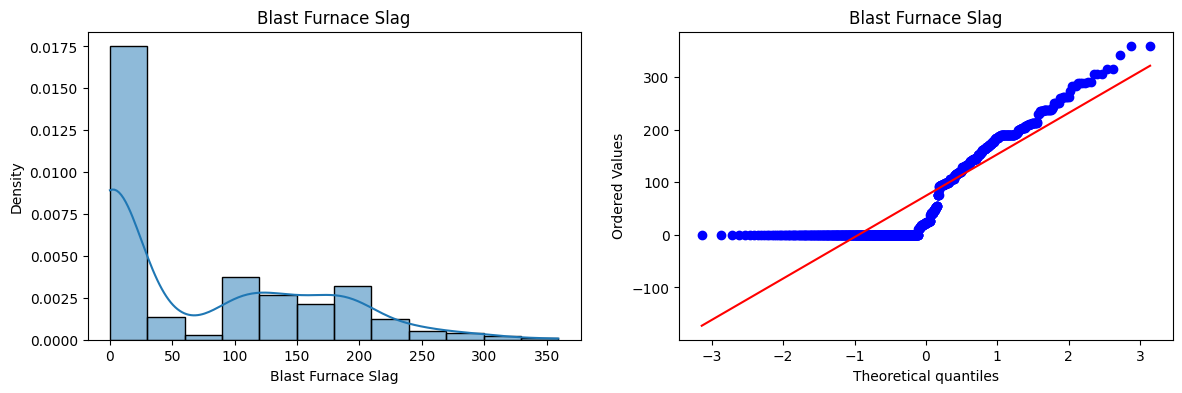

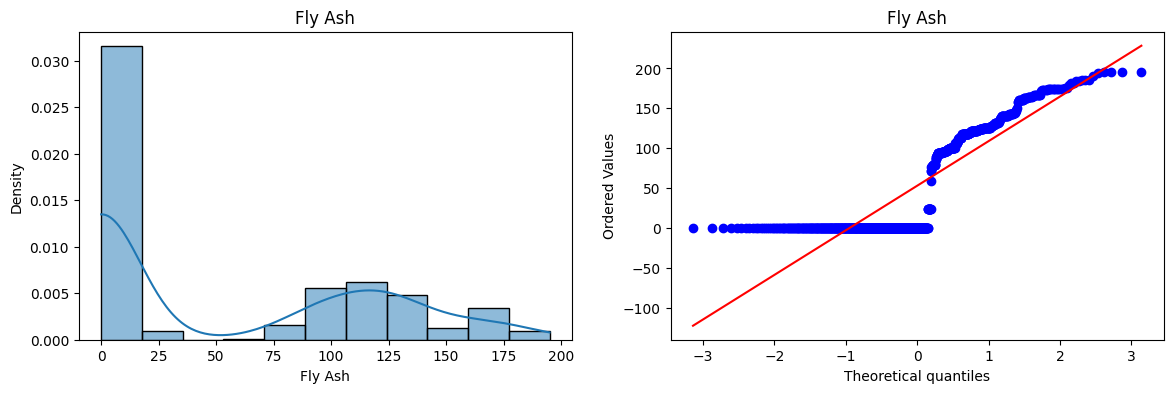

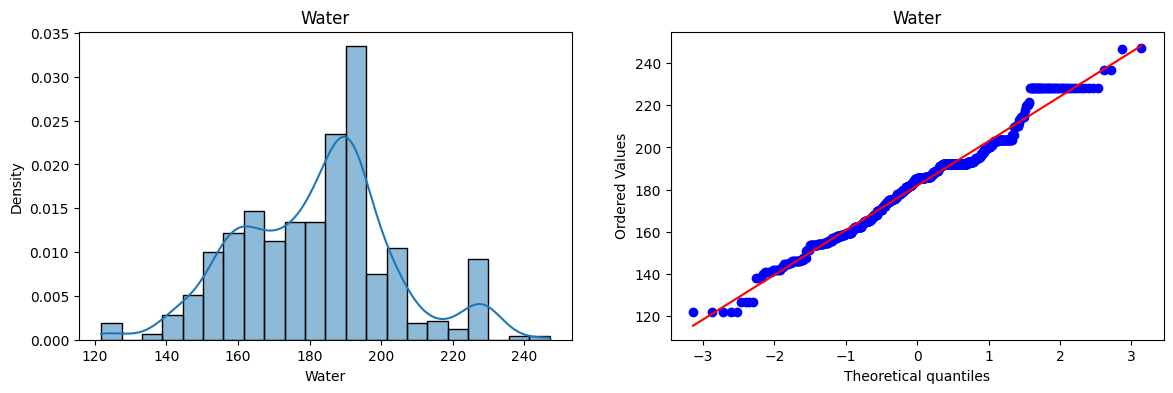

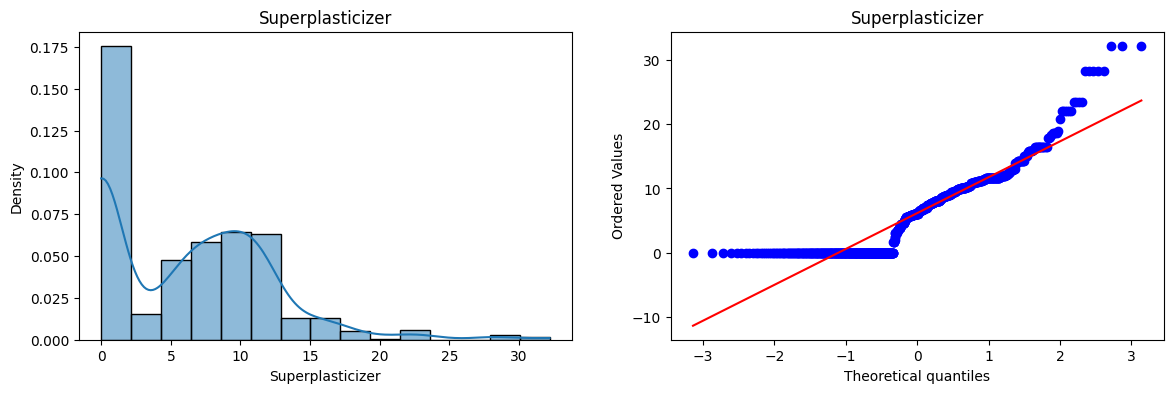

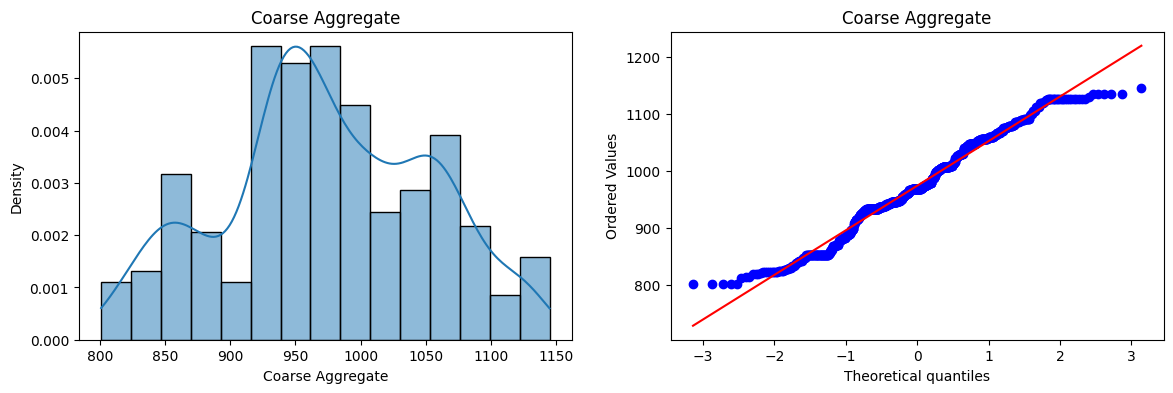

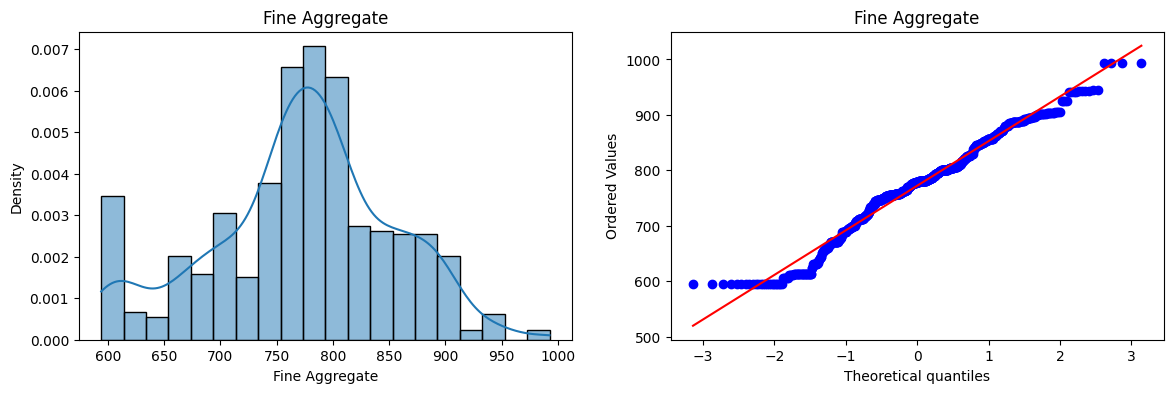

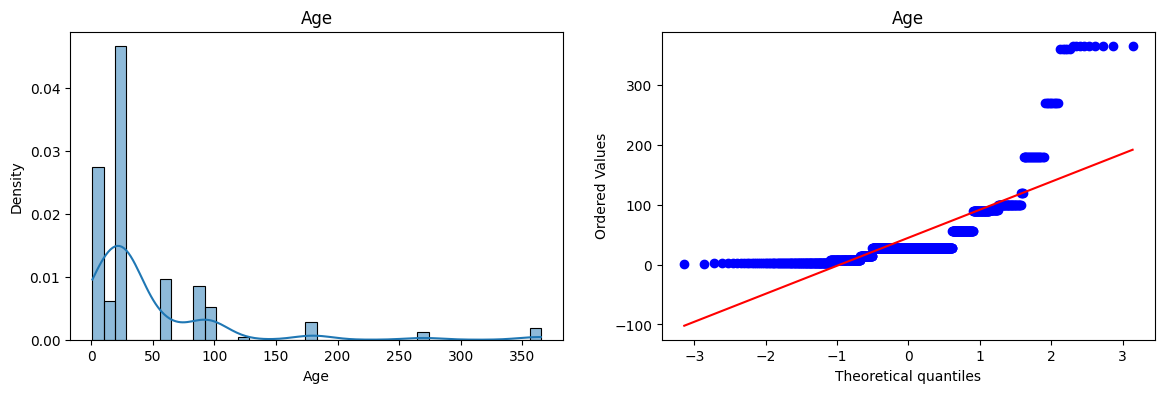

In [17]:
# Plotting the histplot without any transformation
for col in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.histplot(X_train[col],kde=True,stat="density")
  plt.title(col)

  plt.subplot(1,2,2)
  stats.probplot(X_train[col],dist='norm',plot=plt)
  plt.title(col)
  plt.show()

# Applying Box-Cox transform

In [33]:
# Applying the Box-Cox transform
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+0.00000001)
X_test_transformed = pt.transform(X_test+0.00000001)

pd.DataFrame({'cols':X_train.columns,'Box_Cox_lambdas':pt.lambdas_})

,cols,Box_Cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.020795
2,Fly Ash,-0.031170
3,Water,0.772682
4,Superplasticizer,0.077874
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


This are all the value of lambdas after applying Box_Cox transform

In [36]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)

r2_score(y_test,y_pred)

0.8038298020694914

In [38]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_train_transformed.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.949422,1.127823,-0.301920,0.870123,-0.262500,-0.677568,0.10601
1,1.244706,0.743557,1.135470,-0.165055,0.753549,-1.912728,-0.314062,0.10601
2,0.079842,-1.086779,1.130519,-1.047291,0.784338,1.018407,0.025957,-1.67597
3,-0.145641,0.902570,1.102583,0.581224,0.741408,-1.750779,0.583253,0.10601
4,-1.131044,0.812765,1.131917,-1.105297,0.802072,1.368575,0.262623,-1.67597


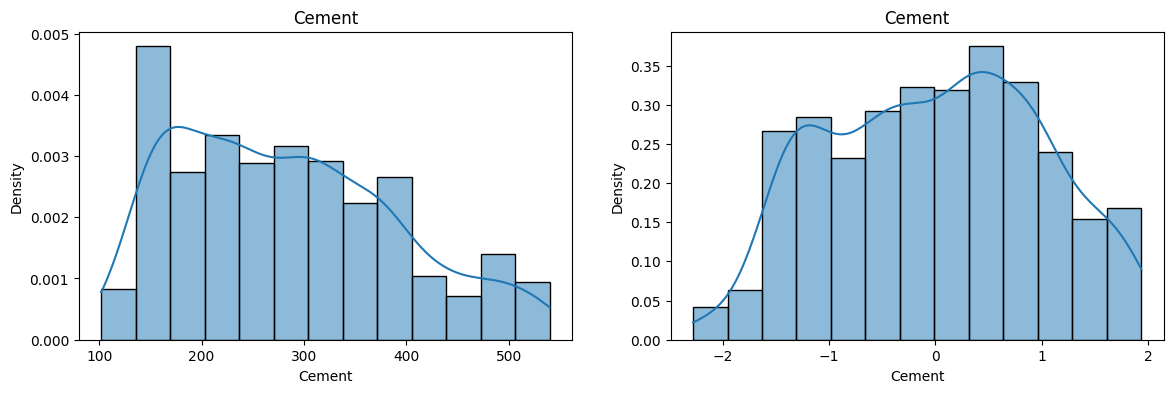

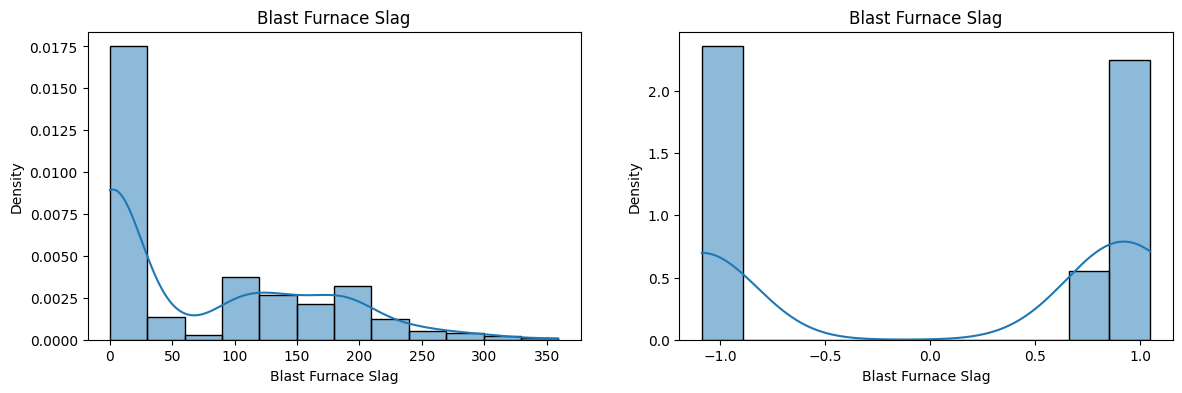

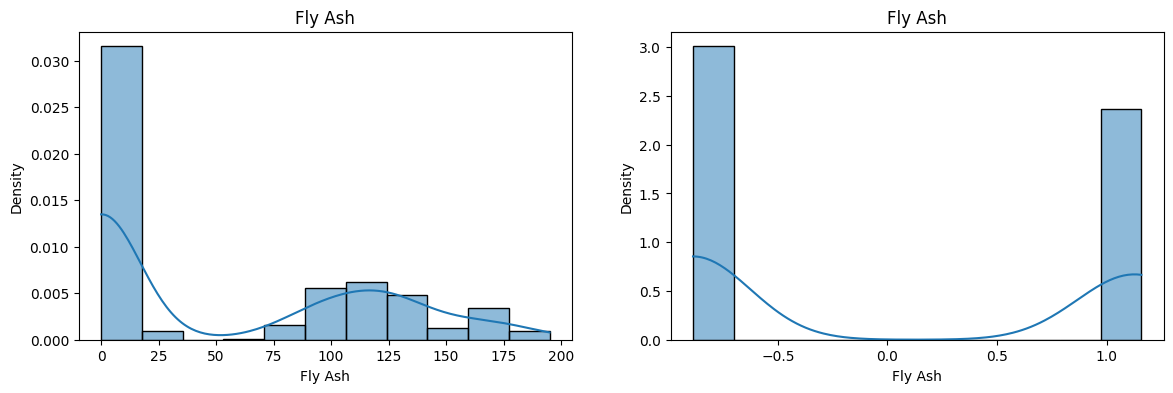

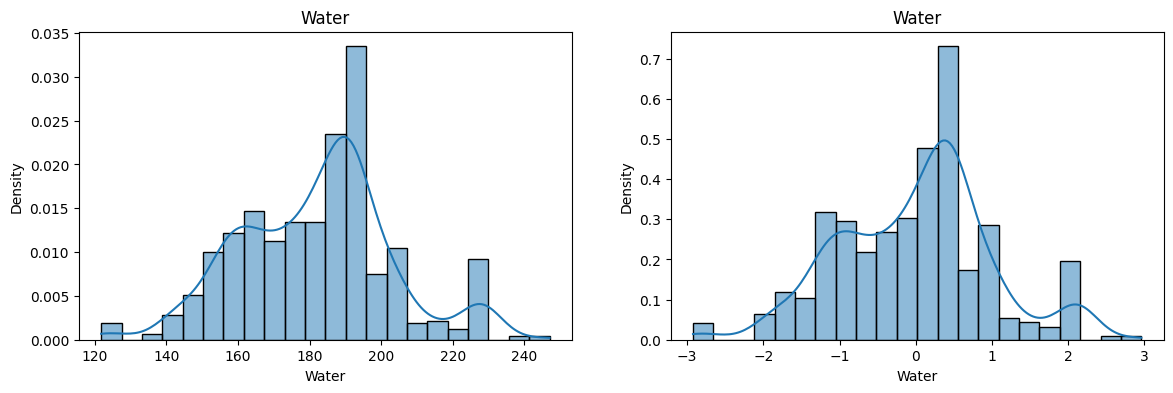

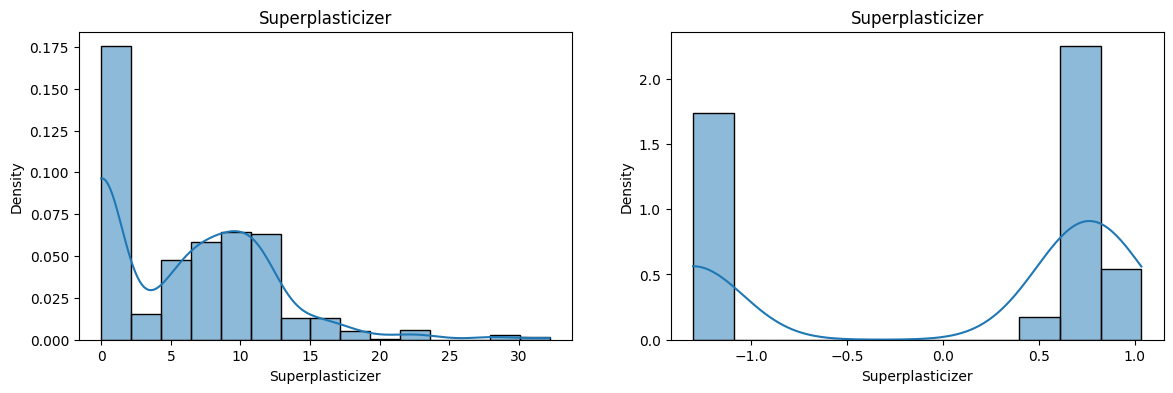

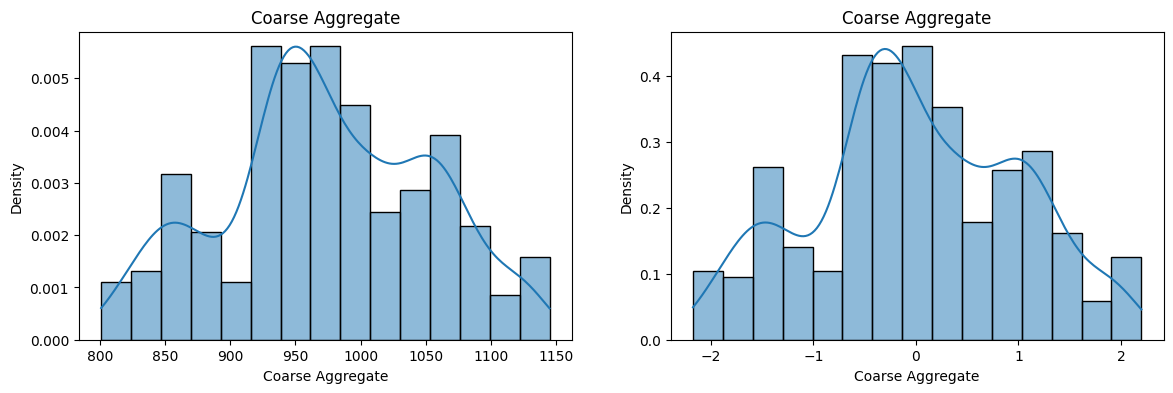

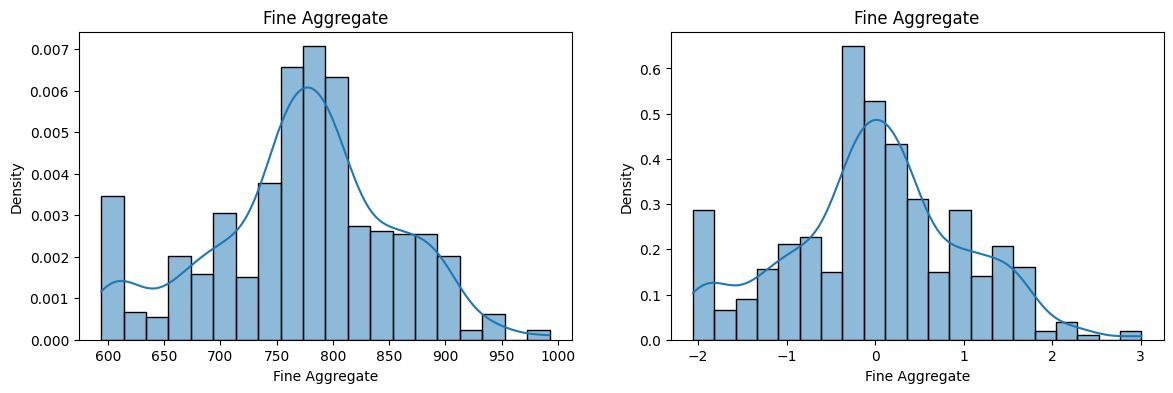

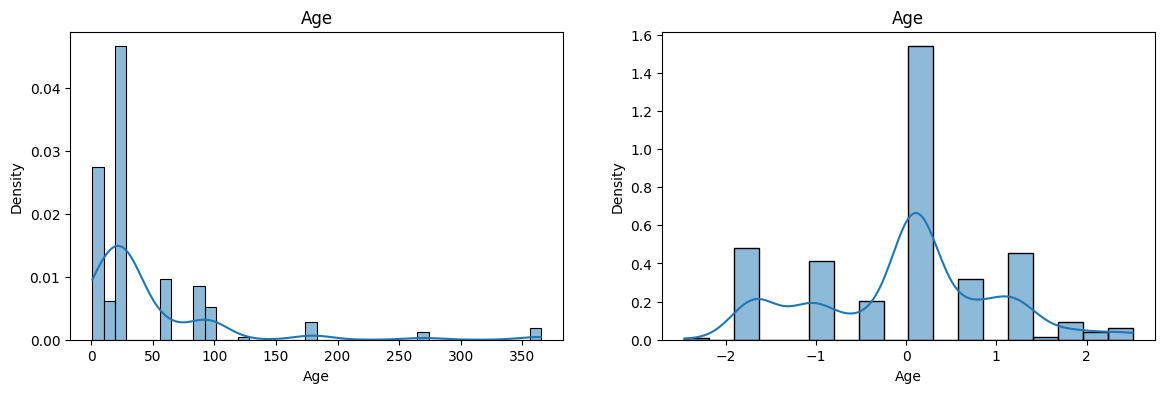

In [41]:
for col in X_train_transformed.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.histplot(X_train[col],kde=True,stat="density")
  plt.title(col)

  plt.subplot(1,2,2)
  sns.histplot(X_train_transformed[col],kde=True,stat="density")
  plt.title(col)
  plt.show()

# Applying Yeo-Johnson Transform

In [46]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)
print("Accuracy is : ",r2_score(y_test,y_pred3))
print("Transformed Dataset are : \n",X_train_transformed2)
pd.DataFrame({'cols':X_train.columns,"Yeo_Johnson_lambdas":pt1.lambdas_})

Accuracy is :  0.8161906512004999
Transformed Dataset are : 
 [[-1.2797506   1.0181684   1.13099335 ... -0.26250397 -0.67756699
   0.10577763]
 [ 1.2448127   0.22258409  1.16667068 ... -1.91271708 -0.3140633
   0.10577763]
 [ 0.07975145 -1.05692806  1.14363683 ...  1.01840694  0.02595441
  -1.664976  ]
 ...
 [-0.84466055 -1.05692806  1.15215184 ...  1.34537013  0.29715299
   1.25751143]
 [ 1.56574084  0.92179625 -0.88493182 ... -1.53724924  0.07620785
   0.10577763]
 [ 0.42653433 -1.05692806  1.12367271 ... -0.62083672  0.09510487
   0.10577763]]


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [47]:
# Apllying cross val score
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2',cv=5))

np.float64(0.6834625141500866)

In [48]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)
X_train_transformed2.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,1.018168,1.130993,-0.301917,1.250424,-0.262504,-0.677567,0.105778
1,1.244813,0.222584,1.166671,-0.165051,0.643937,-1.912717,-0.314063,0.105778
2,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,-1.664976
3,-0.145770,0.835725,1.009268,0.581232,0.585508,-1.750770,0.583249,0.105778
4,-1.131111,0.487511,1.150162,-1.105305,0.886463,1.368579,0.262619,-1.664976


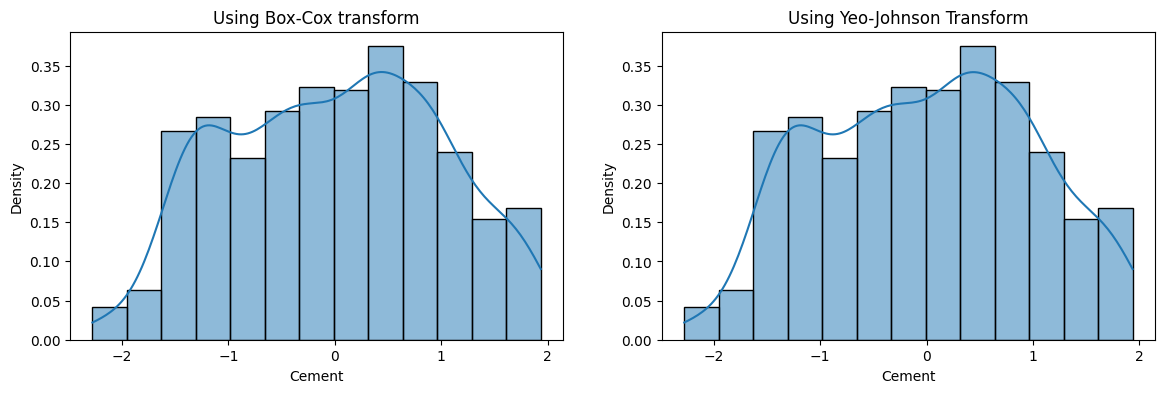

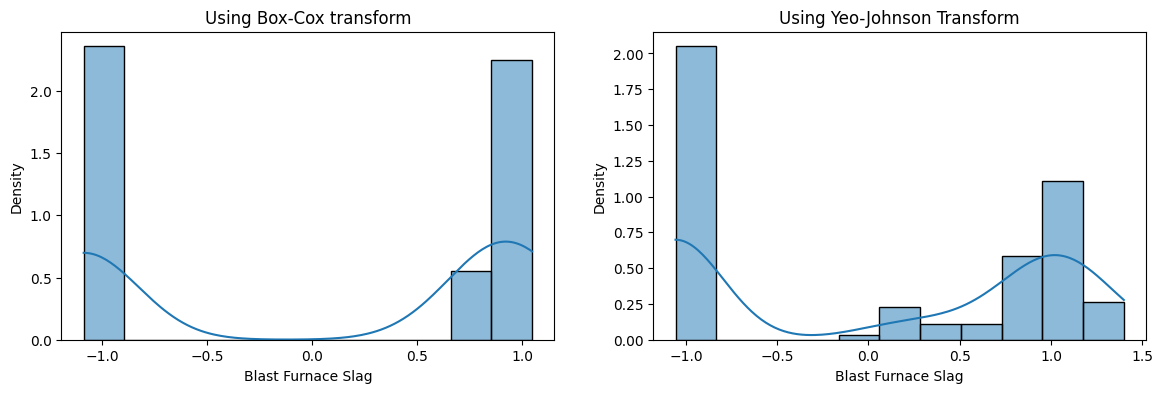

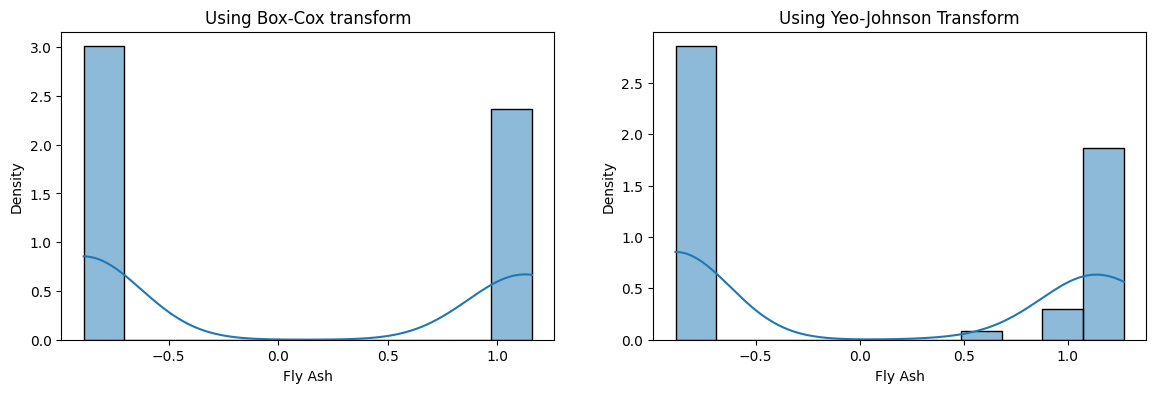

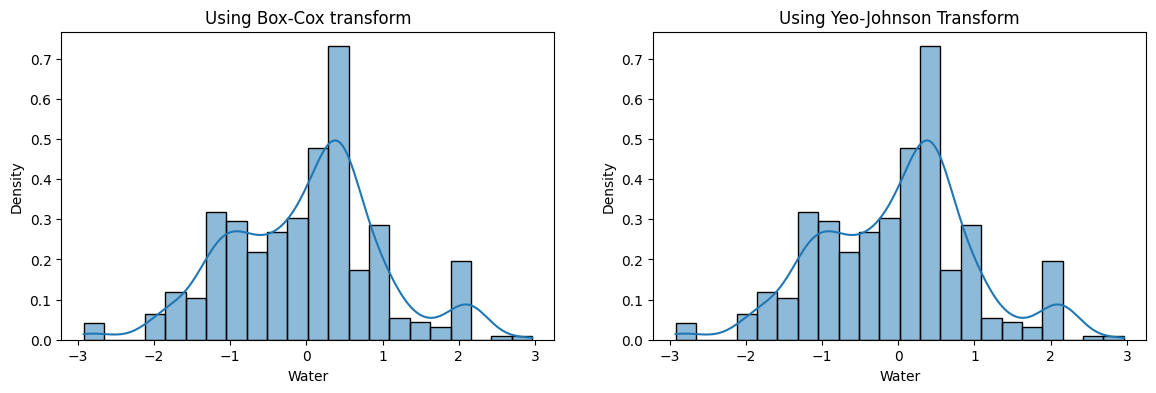

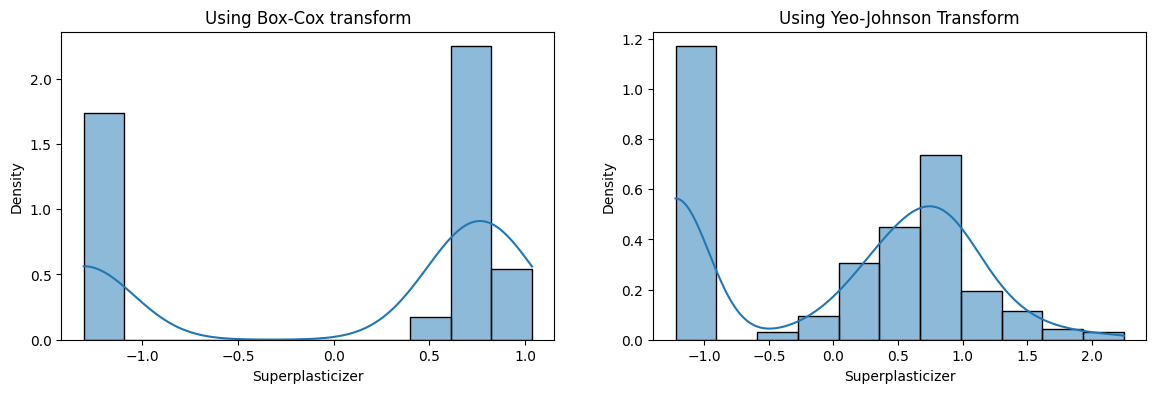

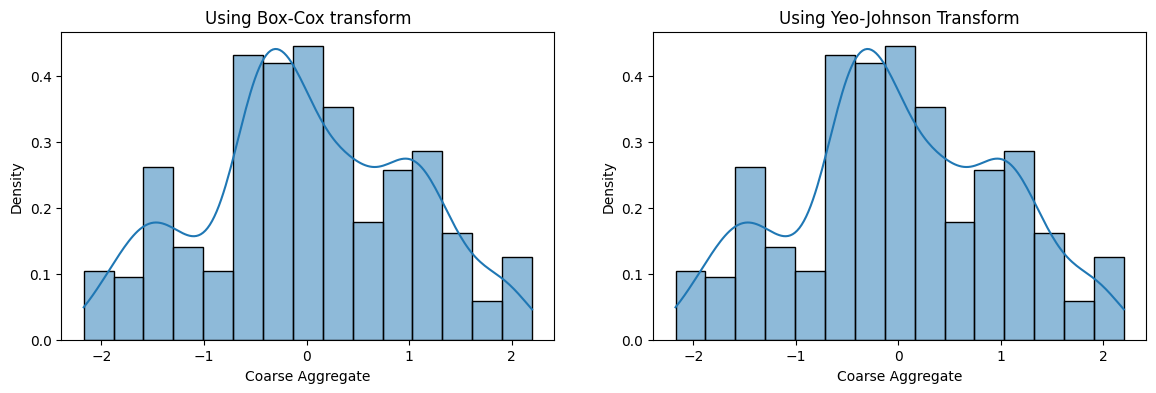

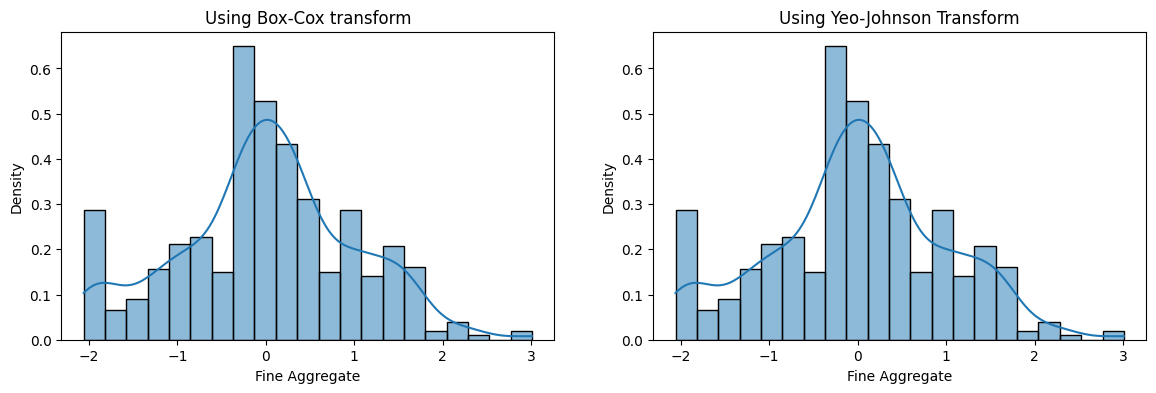

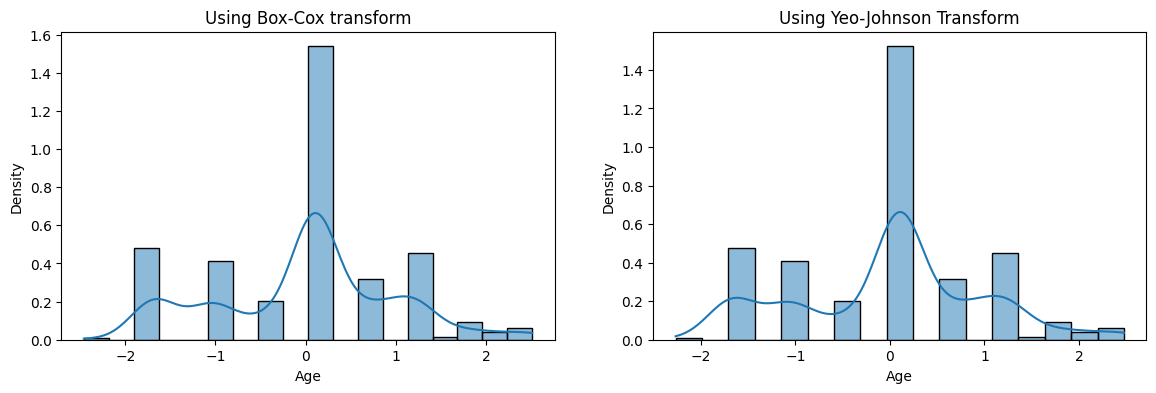

In [49]:
for col in X_train_transformed.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.histplot(X_train_transformed[col],kde=True,stat="density")
  plt.title("Using Box-Cox transform")

  plt.subplot(1,2,2)
  sns.histplot(X_train_transformed2[col],kde=True,stat="density")
  plt.title("Using Yeo-Johnson Transform")
  plt.show()

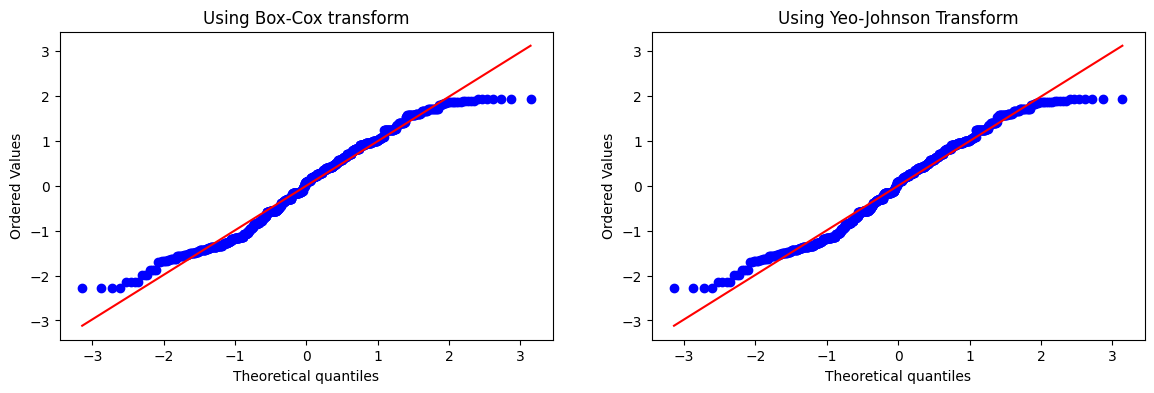

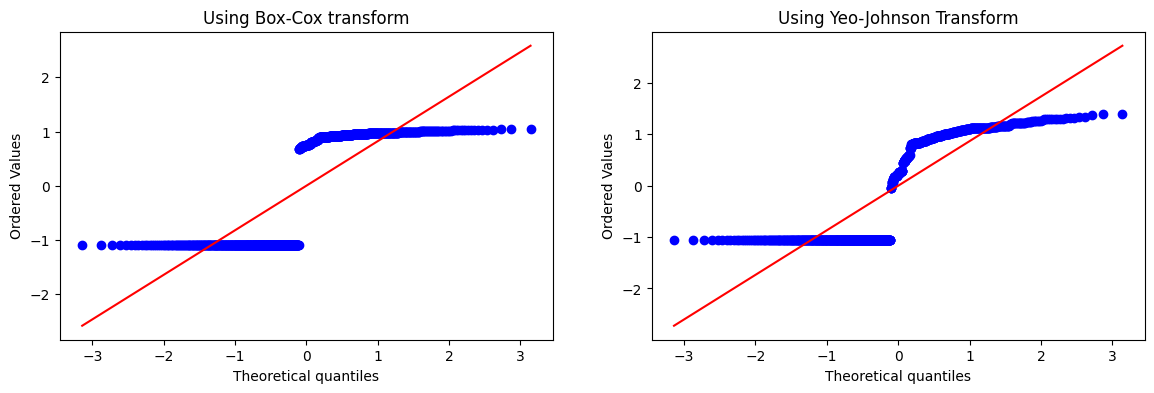

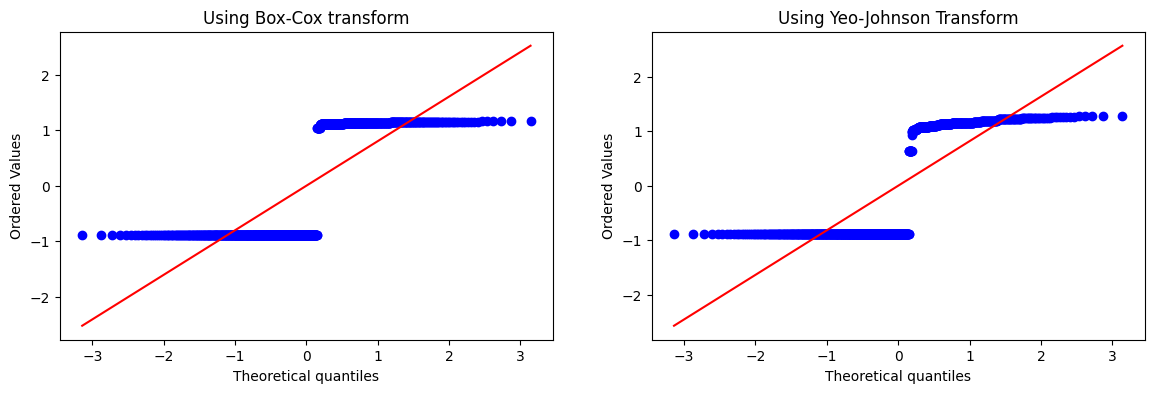

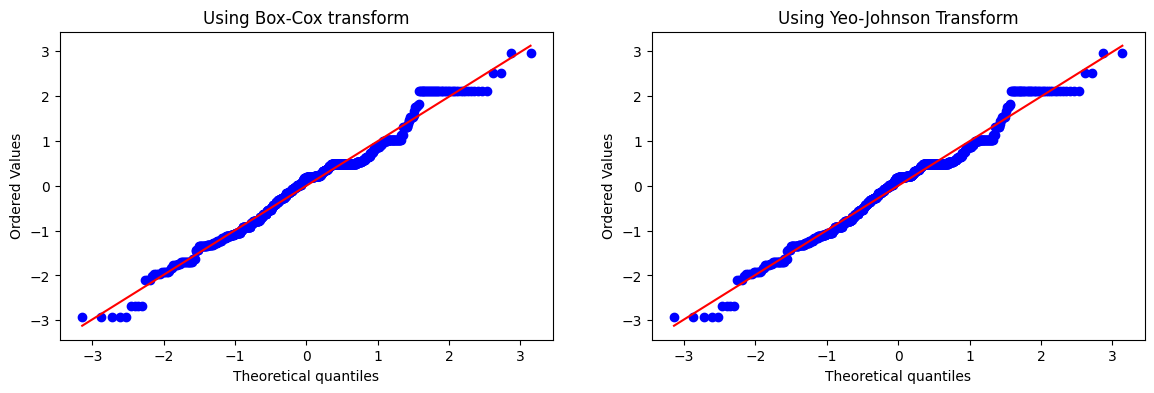

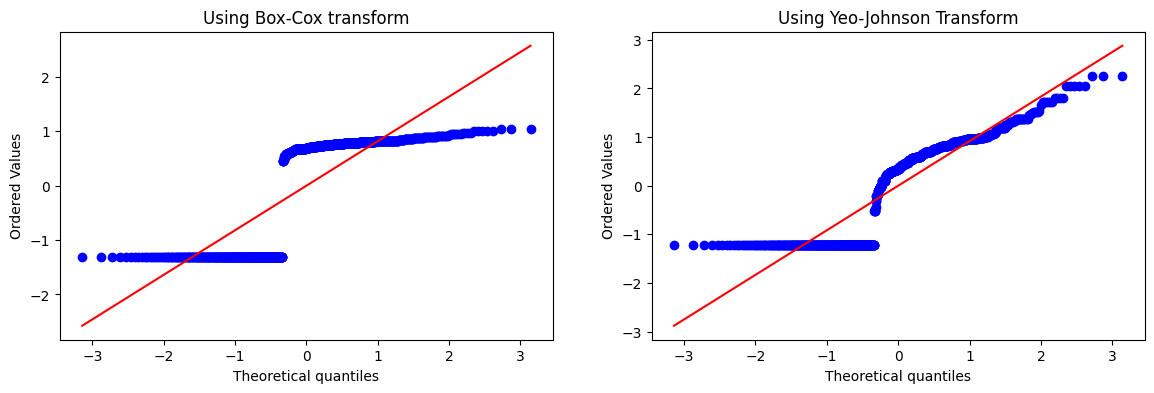

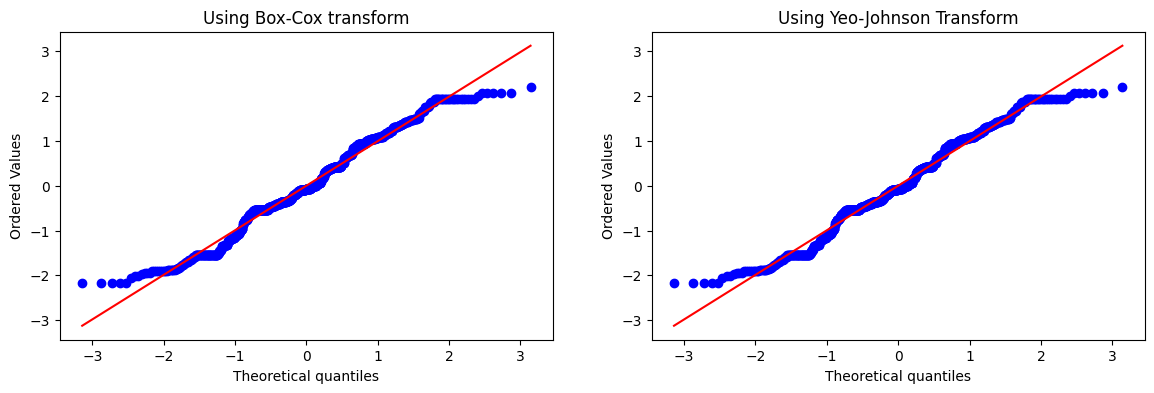

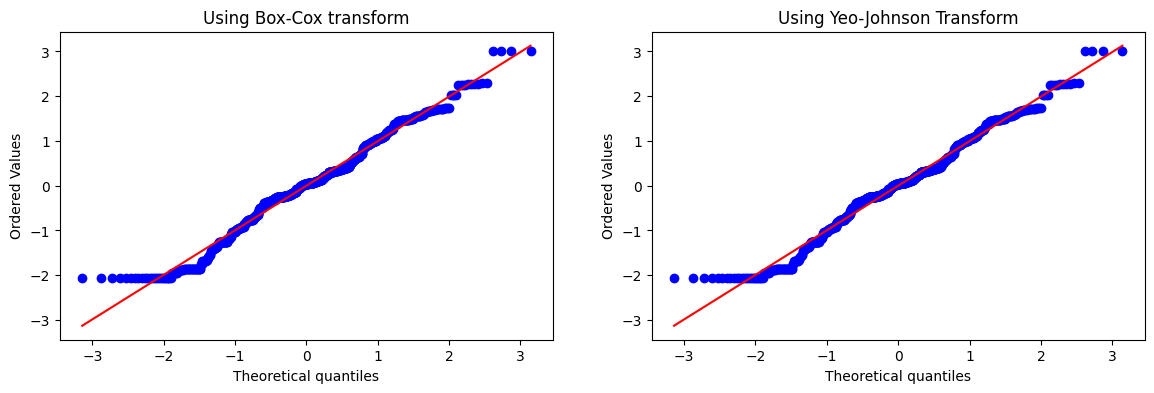

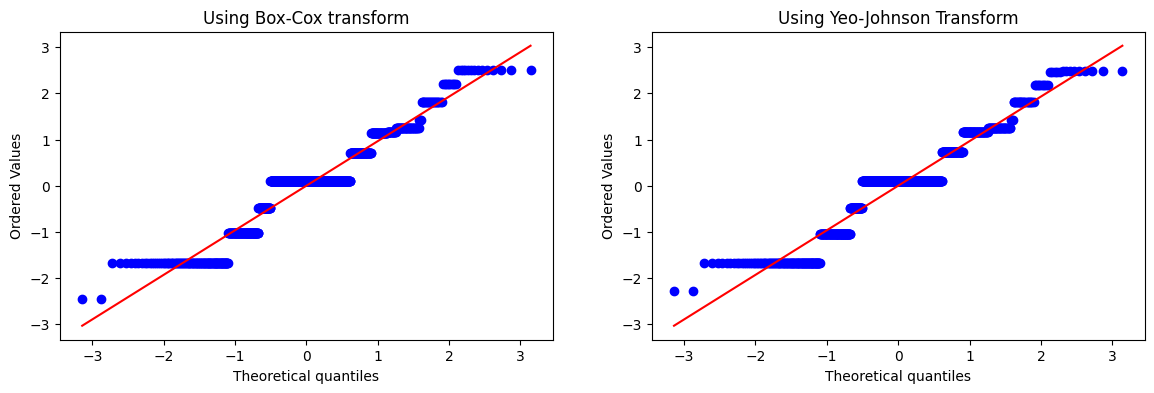

In [50]:
for col in X_train_transformed.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
  plt.title("Using Box-Cox transform")

  plt.subplot(1,2,2)
  stats.probplot(X_train_transformed2[col],dist='norm',plot=plt)
  plt.title("Using Yeo-Johnson Transform")
  plt.show()